In [1]:
from __future__ import division
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

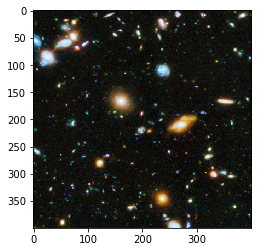

In [2]:
input_image = mpimg.imread('DeepFieldSmall.png')
input_plot = plt.imshow(input_image)

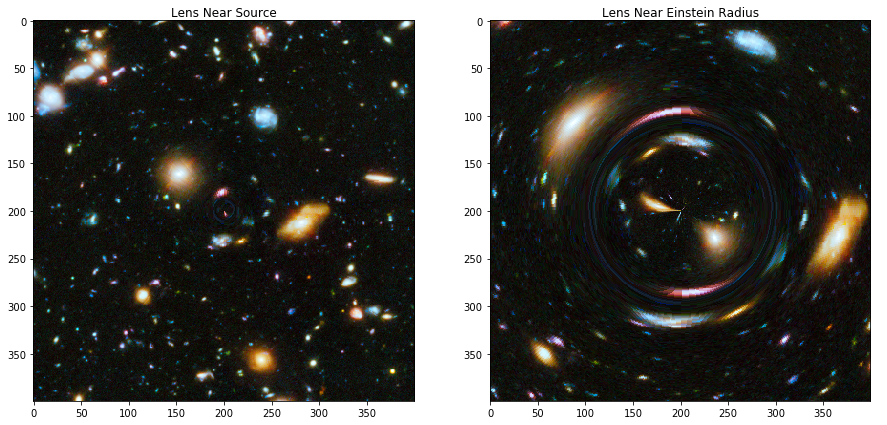

In [6]:
rows, columns, channels = input_image.shape
transformed_image_a = np.zeros( shape=(rows,columns,channels) )
transformed_image_b = np.zeros( shape=(rows,columns,channels) )

D_s = 2.4e22 #Distance to Andromeda
M = 8e38
pixel_scale = 1e18 / rows #Assume galaxy is ~ milky way in diameter

c = 3e8
G = 6.67e-11
pi = 3.14159
x_center = (1/2)*rows
y_center = (1/2)*columns

#x&y pixel coordinates, M mass of ma1s,D_d distance to mass, D_ds distance from mass to image, SI units
def find_new_coords(x,y,a):
    D_d = D_s - a* (4*G*M*D_s)/(c**2 * rows*pixel_scale)
    D_ds = D_s - D_d
    b = ( (x-x_center)**2 + (y-y_center)**2 )**(1/2)*pixel_scale
    beta = b/D_s
    
    theta = beta - ( (D_ds)/(D_s*D_d) )*( (4*pi*M)/(c**2) )
    
    x_new = int( (theta/beta)*(x-x_center) + x_center )
    y_new = int( (theta/beta)*(y-y_center) + y_center )
    
    return (x_new,y_new)

for i in range(0,rows*columns*channels):
    x = ( (i%columns)%rows ) ; y = ( (i//rows)%columns ) ; channel = ( i//(rows*columns) )
    try:
        (x_new_a , y_new_a) = find_new_coords(x,y,0.1)
    except ZeroDivisionError:
        pass #for center point of image
    try:
        transformed_image_a[x,y,channel] = input_image[x_new_a,y_new_a,channel]
    except IndexError:
        if (channel != 3):
            transformed_image_a[x,y,channel] = 0
        else:
            transformed_image_a[x,y,channel] = 1
            
    try:
        (x_new_b , y_new_b) = find_new_coords(x,y,0.9)
    except ZeroDivisionError:
        pass #for center point of image
    try:
        transformed_image_b[x,y,channel] = input_image[x_new_b,y_new_b,channel]
    except IndexError:
        if (channel != 3):
            transformed_image_b[x,y,channel] = 0
        else:
            transformed_image_b[x,y,channel] = 1

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,8))
ax1.imshow(transformed_image_a)
ax1.set_title("Lens Near Source")
ax2.imshow(transformed_image_b)
ax2.set_title("Lens Near Einstein Radius")